# **Modelagem Matemática na Quarentena**

**módulo 5 - soluções numéricas dos modelos matemáticos**

###**Carregando os pacotes necessários**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math # pacote com as funções matemáticas
from scipy.integrate import odeint, solve_ivp # pacote para resolução de equações diferenciais
from scipy import optimize # pacote para resolução de problemas de otimização

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####**Métodos de PVI**

**Método dos Euler Explícito**

In [2]:
def met_euler_explicito(a, b, N, alpha):
	t = np.zeros(N + 1)
	u = np.zeros(N + 1)
	h = (b - a) / N
	t[0] = a
	u[0] = alpha
	for i in range(1, N + 1):
		u[i] = u[i - 1] + h * f(t[i - 1], u[i - 1])
		t[i] = a + i * h
	return t, u

**Método dos Euler Implícito**

In [3]:
def met_euler_implicito(a, b, N, alpha):
	t = np.zeros(N + 1)
	u = np.zeros(N + 1)
	h = (b - a) / N
	t[0] = a
	u[0] = alpha
	for i in range(1, N + 1):
		t1, u1 = met_euler_explicito(a, b, N, alpha)
		u[i] = u[i - 1] + h * f(t[i - 1], u[i - 1]) # euler explícito
		u[i] = u[i - 1] + h * f(t[i], u[i])
		# u[i] = (1 / (1- h * beta)) * u[i - 1]
		t[i] = a + i * h
	return t, u

**Método dos Trapézios**

In [4]:
def met_trapezio(a, b, N, alpha):
	t = np.zeros(N + 1); u = np.zeros(N + 1)
	u = np.zeros(N + 1)
	h = (b - a) / N
	t[0] = a
	u[0] = alpha
	for i in range(1, N + 1):
		u[i] = u[i - 1] + (h / 2) * (f(t[i - 1], u[i - 1]) + f(t[i - 1], u[i - 1])) # trapézio explícito
		u[i] = u[i - 1] + (h / 2) * (f(t[i - 1], u[i - 1]) + f(t[i], u[i]))
		# u[i] = ((2 + h * beta) / (2 - h * beta)) * u[i - 1]
		t[i] = a + i * h
	return t, u

####**Exemplo $u(t) = e^{\beta t}$**

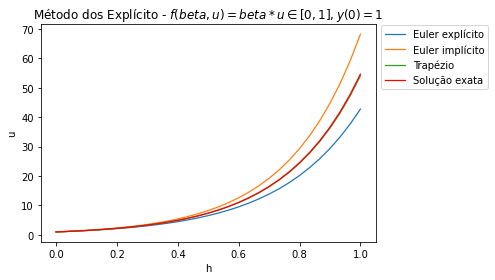

In [5]:
# exemplo u(t) = exp(beta * t)
beta = 4
def f(t, u):
  r = beta * u
  return r

t, u1 = met_euler_explicito(0, 1, 30, 1)
t, u2 = met_euler_implicito(0, 1, 30, 1)
t, u3 = met_trapezio(0, 1, 30, 1)
ax = plt.subplot(111)
ax.plot(t, u1, "-", LineWidth = 1.25, label = "Euler explícito") # https://stackoverflow.com/questions/13359951/is-there-a-list-of-line-styles-in-matplotlib
ax.plot(t, u2, "-", LineWidth = 1.25, label = "Euler implícito")
ax.plot(t, u3, "-", LineWidth = 1.25, label = "Trapézio")
ax.plot(t, np.exp(beta * t), "-", LineWidth = 1.25, color = "red", label = "Solução exata")
plt.xlabel("h")
plt.ylabel("u")
plt.title("Método dos Explícito - $f(beta, u) = beta * u \in [0, 1], y(0) = 1$")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# data = {'t': t, 'u - euler explícito': u1, 'u - euler implícito': u2, 'u - trapézio': u3}
# df = pd.DataFrame(data=data)
# print(df)

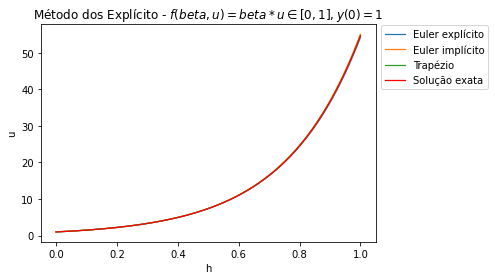

In [6]:
# exemplo w(t) = exp(beta * t)
beta = 4
def f(t, u):
  r = beta * u
  return r

t, u1 = met_euler_explicito(0, 1, 1000, 1)
t, u2 = met_euler_implicito(0, 1, 1000, 1)
t, u3 = met_trapezio(0, 1, 1000, 1)
ax = plt.subplot(111)
ax.plot(t, u1, "-", LineWidth = 1.25, label = "Euler explícito")
ax.plot(t, u2, "-", LineWidth = 1.25, label = "Euler implícito")
ax.plot(t, u3, "-", LineWidth = 1.25, label = "Trapézio")
ax.plot(t, np.exp(beta * t), "-", LineWidth = 1.25, color = "red", label = "Solução exata")
plt.xlabel("h")
plt.ylabel("u")
plt.title("Método dos Explícito - $f(beta, u) = beta * u \in [0, 1], y(0) = 1$")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
plt.show()

# data = {'t': t, 'u - euler explícito': u1, 'u - euler implícito': u2, 'u - trapézio': u3}
# df = pd.DataFrame(data=data)
# print(df)

#####**Erro de Aproximação**

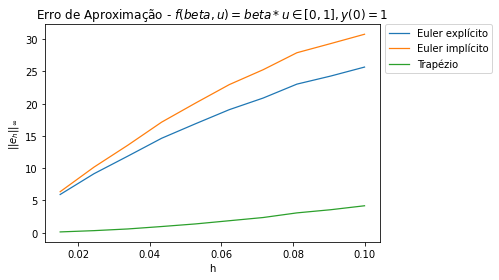

In [7]:
# exemplo u(t) = exp(beta * t)
# erro local
beta = 4
def f(t, u):
  r = beta * u
  return r

a = 0.015; b = 0.100; i = 0.01
esp = np.linspace(a, b, int(round(1 + (b - a) / i)))
eh_euler_exp = np.zeros(len(esp))
eh_euler_imp = np.zeros(len(esp))
eh_trapez = np.zeros(len(esp))
i = 0
for k in esp:
  N = int(round((1 - 0) / k))
  t, u1 = met_euler_explicito(0, 1, N, 1)
  t, u2 = met_euler_implicito(0, 1, N, 1)
  t, u3 = met_trapezio(0, 1, N, 1)
  exata = np.exp(beta * t) # e_h(t_i) = u(t_i) - u_i
  eh_euler_exp[i] = np.linalg.norm(exata - u1, np.inf)
  eh_euler_imp[i] = np.linalg.norm(exata - u2, np.inf)
  eh_trapez[i] = np.linalg.norm(exata - u3, np.inf)
  i = i + 1

ax = plt.subplot(111)
ax.plot(esp, eh_euler_exp, "-", LineWidth = 1.25, label = "Euler explícito")
ax.plot(esp, eh_euler_imp, "-", LineWidth = 1.25, label = "Euler implícito")
ax.plot(esp, eh_trapez, "-", LineWidth = 1.25, label = "Trapézio")
plt.xlabel("h")
plt.ylabel("$||e_h||_{\infty}$")
plt.title("Erro de Aproximação - $f(beta, u) = beta * u \in [0, 1], y(0) = 1$")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

# data = {'eh_euler_exp': eh_euler_exp, 'eh_euler_imp': eh_euler_imp, 'eh_trapez': eh_trapez}
# df = pd.DataFrame(data=data)
# print(df)

#####**Ordem de Convergência Numérica**

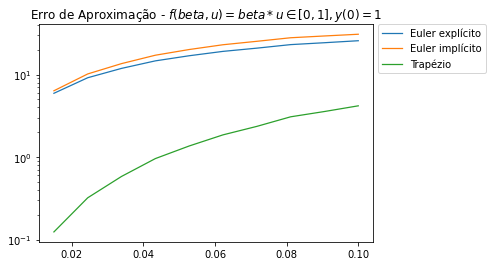

In [8]:
ax = plt.subplot(111)
ax.plot(esp, eh_euler_exp, "-", LineWidth = 1.25, label = "Euler explícito")
ax.plot(esp, eh_euler_imp, "-", LineWidth = 1.25, label = "Euler implícito")
ax.plot(esp, eh_trapez, "-", LineWidth = 1.25, label = "Trapézio")
# plt.xlabel("log(h)")
# plt.ylabel("$log(||e_h||_{\infty})$")
plt.title("Erro de Aproximação - $f(beta, u) = beta * u \in [0, 1], y(0) = 1$")

plt.yscale('log')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()

In [9]:
# p = (log(||e_h1|| / ||e_h2||)) / (log(h1 / h2))
beta = 4
def f(t, u):
  r = beta * u
  return r

h1 = 0.001; # h2 = 0.002
h = [h1, h1 / 2]

i = 1
for k in h:
  t, u1 = met_euler_explicito(0, 1, int((1 - 0) / k), 1)
  t, u2 = met_euler_implicito(0, 1, int((1 - 0) / k), 1)
  t, u3 = met_trapezio(0, 1, int((1 - 0) / k), 1)
  exata = np.exp(beta * t) # e_h(t_i) = u(t_i) - u_i
  if i == 1:
    eh1_euler_explicito = np.linalg.norm(exata - u1, np.inf)
    eh1_euler_implicito = np.linalg.norm(exata - u2, np.inf)
    eh1_trapezio = np.linalg.norm(exata - u3, np.inf)
    i = i + 1
  elif i == 2:
    eh2_euler_explicito = np.linalg.norm(exata - u1, np.inf)
    eh2_euler_implicito = np.linalg.norm(exata - u2, np.inf)
    eh2_trapezio = np.linalg.norm(exata - u3, np.inf)
    i = i + 1

p_euler_explicito = np.log(eh1_euler_explicito / eh2_euler_explicito) / np.log(h[0] / h[1])
p_euler_implicito = np.log(eh1_euler_implicito / eh2_euler_implicito) / np.log(h[0] / h[1])
p_trapezio = np.log(eh1_trapezio / eh2_trapezio) / np.log(h[0] / h[1])

print(f'Euler explícito: p = {p_euler_explicito:.4f}')
print(f'Euler implícito: p = {p_euler_implicito:.4f}')
print(f'Trapézio: p = {p_trapezio:.4f}')

Euler explícito: p = 0.9952
Euler implícito: p = 0.9990
Trapézio: p = 1.9978


####**Aplicação em dados do COVID-19**

#####**Modelo SID - ajuste dos dados**

In [10]:
# dados COVID-19 no Brasil - infectados, mortes e recuperados
base_dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid-brasil.csv', sep = ";")
base_dados.head()

,Data,Dias_num,Infectados,Mortes,Recuperados
0,25/02,1,0,0,0
1,26/02,2,1,0,0
2,27/02,3,1,0,0
3,28/02,4,1,0,0
4,29/02,5,2,0,0


Aplica-se o modelo SID aos dados do COVID-19 no Brasil.

In [11]:
# função que representa a solução do modelo SID usando o método do trapézio, cujos parâmetros beta e gamma serão estimados usando otimização
def model_sid_trap(param):
  I = np.zeros(n); D = np.zeros(n); S = np.zeros(n); N = np.zeros(n);
  beta = param[0]; gamma = param[1]; # h = param[0]; beta = param[1]; gamma = param[2];

  I[0] = val_inic[1]
  D[0] = val_inic[2]
  S[0] = val_inic[0]
  N = val_inic[3]

  for i in range(0, n-1):
    I[i+1] = ((1 + (h / 2) * ((beta / N) * S[i] - gamma)) / (1 - (h / 2) * ((beta / N) * S[i] - gamma))) * I[i]
    D[i+1] = D[i] + gamma * (h / 2) * (I[i+1] + I[i])
    S[i+1] = N - I[i+1] - D[i+1]
  return sum((I - y1)**2 + (D - y2)**2)

In [12]:
# obtendo solução 1 com h = 0.333
y1 = base_dados.iloc[:, 2].values # infectados
y2 = base_dados.iloc[:, 3].values # mortes

# estimando os parâmetros: beta, gamma
h = 0.333;
val_inic = [210147124, 1, 0, 210147125] # valores iniciais: S(1), I(1), D(1), N(1)
param = [0.4, 0.02]
n = len(base_dados)
sol1 = optimize.fmin_bfgs(model_sid_trap, param, disp=0)
print(sol1) # beta e gamma

# obtendo I_sol1, D_sol1, S_sol1 usando os valores dos parâmetros estimados
param = sol1 # param = [sol[0], sol[1], sol[2]] # param = [0.001, 0.46228, 0.0085] # parâmetros: h, beta, gamma
n = len(base_dados)
I_sol1 = np.zeros(n); D_sol1 = np.zeros(n); S_sol1 = np.zeros(n); N_sol1 = np.zeros(n);
I_sol1[0] = val_inic[1]; D_sol1[0] = val_inic[2]; S_sol1[0] = val_inic[0]; N = val_inic[3]
beta = param[0]; gamma = param[1];
for i in range(0, n-1):
  I_sol1[i+1] = ((1 + (h / 2) * ((beta / N) * S_sol1[i] - gamma)) / (1 - (h / 2) * ((beta / N) * S_sol1[i] - gamma))) * I_sol1[i]
  D_sol1[i+1] = D_sol1[i] + gamma * (h / 2) * (I_sol1[i+1] + I_sol1[i])
  S_sol1[i+1] = N - I_sol1[i+1] - D_sol1[i+1]

[0.40438556 0.02088962]


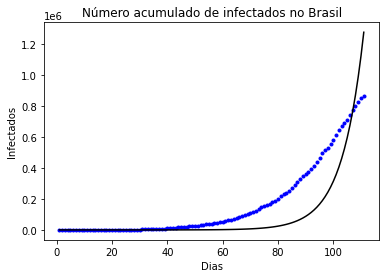

In [13]:
t = base_dados.iloc[:, 1].values # dias_num
y1 = base_dados.iloc[:, 2].values # infectados
plt.plot(t, y1, ".", color = "blue")
plt.plot(t, I_sol1, "-", color = "black")
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Número acumulado de infectados no Brasil")
plt.show()

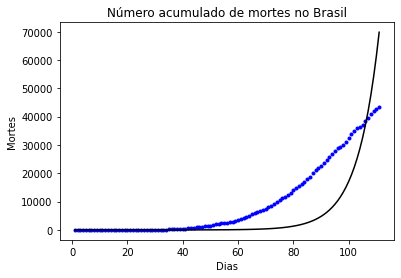

In [14]:
t2 = base_dados.iloc[:, 1].values # dias_num
y2 = base_dados.iloc[:, 3].values # mortes
plt.plot(t2, y2, ".", color = "blue")
plt.plot(t, D_sol1, "-", color = "black")
plt.xlabel("Dias")
plt.ylabel("Mortes")
plt.title("Número acumulado de mortes no Brasil")
plt.show()

#####**Ordem de Convergência Numérica**

In [15]:
# obtendo solução 2 com h = 0.344
y1 = base_dados.iloc[:, 2].values # infectados
y2 = base_dados.iloc[:, 3].values # mortes

# estimando os parâmetros: beta, gamma
h = 0.344;
val_inic = [210147124, 1, 0, 210147125] # valores iniciais: S(1), I(1), D(1), N(1)
param = [0.4, 0.02]
n = len(base_dados)
sol2 = optimize.fmin_bfgs(model_sid_trap, param, disp=0)
print(sol2) # beta e gamma

# obtendo I_sol2, D_sol2, S_sol2 usando os valores dos parâmetros estimados
param = sol2 # param = [sol[0], sol[1], sol[2]] # param = [0.001, 0.46228, 0.0085] # parâmetros: h, beta, gamma
n = len(base_dados)
I_sol2 = np.zeros(n); D_sol2 = np.zeros(n); S_sol2 = np.zeros(n); N_sol2 = np.zeros(n);
I_sol2[0] = val_inic[1]; D_sol2[0] = val_inic[2]; S_sol2[0] = val_inic[0]; N = val_inic[3]
beta = param[0]; gamma = param[1];
for i in range(0, n-1):
  I_sol2[i+1] = ((1 + (h / 2) * ((beta / N) * S_sol2[i] - gamma)) / (1 - (h / 2) * ((beta / N) * S_sol2[i] - gamma))) * I_sol2[i]
  D_sol2[i+1] = D_sol2[i] + gamma * (h / 2) * (I_sol2[i+1] + I_sol2[i])
  S_sol2[i+1] = N - I_sol2[i+1] - D_sol2[i+1]

[0.39145459 0.0202216 ]


In [16]:
# considerando como solução exata: h = 0.414
y1 = base_dados.iloc[:, 2].values # infectados
y2 = base_dados.iloc[:, 3].values # mortes

# estimando os parâmetros: beta, gamma
h = 0.414;
val_inic = [210147124, 1, 0, 210147125] # valores iniciais: S(1), I(1), D(1), N(1)
param = [0.4, 0.02]
n = len(base_dados)
sol = optimize.fmin_bfgs(model_sid_trap, param, disp=0)
print(sol) # beta e gamma

# obtendo I_exata, D_exata, S_exata usando os valores dos parâmetros estimados
param = sol # param = [sol[0], sol[1], sol[2]] # param = [0.001, 0.46228, 0.0085] # parâmetros: h, beta, gamma
n = len(base_dados)
I_exata = np.zeros(n); D_exata = np.zeros(n); S_exata = np.zeros(n); N_exata = np.zeros(n);
I_exata[0] = val_inic[1]; D_exata[0] = val_inic[2]; S_exata[0] = val_inic[0]; N = val_inic[3]
beta = param[0]; gamma = param[1];
for i in range(0, n-1):
  I_exata[i+1] = ((1 + (h / 2) * ((beta / N) * S_exata[i] - gamma)) / (1 - (h / 2) * ((beta / N) * S_exata[i] - gamma))) * I_exata[i]
  D_exata[i+1] = D_exata[i] + gamma * (h / 2) * (I_exata[i+1] + I_exata[i])
  S_exata[i+1] = N - I_exata[i+1] - D_exata[i+1]

[0.32526616 0.01680204]


In [17]:
# p = (log(||e_h1|| / ||e_h2||)) / (log(h1 / h2))

# solução: I_sol1, D_sol1, S_sol1 (h = 0.333)
# solução: I_sol2, D_sol2, S_sol2 (h = 0.344)
# solução exata: I_exata, D_exata, S_exata (h = 0.414)

h1 = 0.333; h2 = 0.344;
h = [h1, h2]

eh1 = np.linalg.norm(I_exata - I_sol1, np.inf)
eh2 = np.linalg.norm(I_exata - I_sol2, np.inf)
p_I = np.log(eh1 / eh2) / np.log(h[0] / h[1])

eh1 = np.linalg.norm(D_exata - D_sol1, np.inf)
eh2 = np.linalg.norm(D_exata - D_sol2, np.inf)
p_D = np.log(eh1 / eh2) / np.log(h[1] / h[0])

print(f'Trapézio: p_I = {p_I:.4f}')
print(f'Trapézio: p_D = {p_D:.4f}')

Trapézio: p_I = 2.0829
Trapézio: p_D = 2.0376


#####**Pico da pandeia para população de infectados**

O pico de infectados se dá no 173º dia, com o valor de 168384435.0.


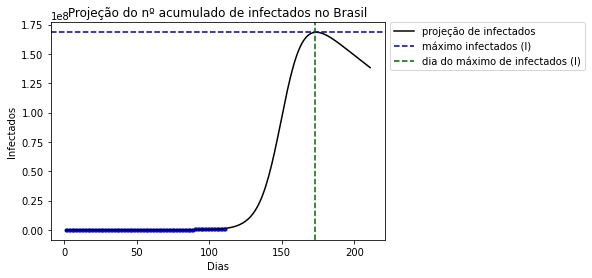

In [18]:
# solução com h = 0.33
t = base_dados.iloc[:, 1].values # dias_num
y1 = base_dados.iloc[:, 2].values # infectados
h = 0.333
n = len(base_dados)
sol1 = optimize.fmin_bfgs(model_sid_trap, param, disp=0)

#  obtendo dados para a projeção e valores de pico de infectados
beta = sol1[0]; gamma = sol1[1];
n = len(base_dados)+100
I = np.zeros(n); D = np.zeros(n); S = np.zeros(n); N = np.zeros(n);
I[0] = val_inic[1]; D[0] = val_inic[2]; S[0] = val_inic[0]; N = val_inic[3]
for i in range(0, n-1):
  I[i+1] = ((1 + (h / 2) * ((beta / N) * S[i] - gamma)) / (1 - (h / 2) * ((beta / N) * S[i] - gamma))) * I[i]
  D[i+1] = D[i] + gamma * (h / 2) * (I[i+1] + I[i])
  S[i+1] = N - I[i+1] - D[i+1]
for i in range(0, n-1):
  if I[i+1] < I[i]:
    if (I[i+1] < I[i]) and (I[i+1] <= I[i-1]):
      I_max = I[i]
      dia_max = i
      print(f"O pico de infectados se dá no {i}º dia, com o valor de {round(I[i+1])}.")
      break

ax = plt.subplot(111)
ax.plot(t, y1, ".", color = "blue")
ax.plot(np.arange(1, len(I)+1, 1), I, "-", color = "black", label = "projeção de infectados")
ax.axhline(y = I_max, xmin = 0, xmax = max(t), color = "darkblue", label = "máximo infectados (I)", linestyle = '--')
ax.axvline(x = dia_max, ymin = 0, ymax = max(t), color = "darkgreen", label = "dia do máximo de infectados (I)", linestyle = '--')
plt.xlabel("Dias")
plt.ylabel("Infectados")
plt.title("Projeção do nº acumulado de infectados no Brasil")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.89))
plt.show()